tensor([1.0000, 0.0000, 0.0000, 0.5848], grad_fn=<SelectBackward0>)


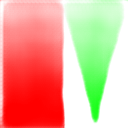

In [10]:
from canvas_env import decode, get_dist
import torch
from PIL import Image
from IPython.display import display

#                                        size    opacity
# 0-9: stroke - (x0, y0, x1, y1, x2, y2, z0, z2, w0, w2)
# 10-12: color
# 13: erase or draw

action = [
    #x0      y0      x1      y1      x2      y2      z0      z2      w0      w2      r       g       b       e
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # [0.5, 0.5, 0.75, 0.75, 1.0, 1.0, 0.9999, 0.9998, 0.5,    0.5, 0, 1, 0, 0.5994],
    [0.0, 0.25, 0.5, 0.25, 1.0, 0.25, 0.9999, 0.9998, 0.0,    1.0, 1, 0, 0, 0.5994],
    [0.0, 0.75, 0.5, 0.75, 1.0, 0.75, 0.9999, 0.0,    0.0,    1.0, 0, 1, 0, 0.5994],
    #[0.0, 1.0, 0.5, 0.5, 1.0, 0.0, 0.9884, 0.9799, 1.0,    1.0, 1, 0, 0, 0.6029],

    # [0.6958, 0.5215, 0.0003, 0.9997, 0.2324, 0.6957, 0.9999, 0.9998, 1.0,    1.0, 0, 1, 0, 0.5994],
    # [0.2512, 0.7667, 0.0159, 0.8627, 0.3469, 0.2216, 0.9884, 0.9799, 1.0,    1.0, 1, 0, 0, 0.3029],
    # [0.2512, 0.7667, 0.0159, 0.8627, 0.3469, 0.2216, 0.9884, 0.9799, 1.0,    0.5, 1, 0, 0, 0.529]
    
    # [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]


# round up action numbers to 2 decimal places
for i in range(len(action)):
    for j in range(len(action[i])):
        action[i][j] = round(action[i][j], 4)

# print(str(action))

action = torch.tensor(action, dtype=torch.float32)

canvas = torch.zeros(1, 4, 128, 128)

canvas = decode(action, canvas)

canvas[:, :3] = canvas[:, :3] / (canvas[:, 3:4] + 1e-8)

# sample color from canvas
print(canvas[0, :, int(0.34 * 128), int(0.22 * 128)])

display(Image.fromarray((canvas[0].permute(1, 2, 0).detach().numpy() * 255).astype('uint8')))